In [1]:
%matplotlib ipympl
import numpy as np
import rite_vs2
import matplotlib.pyplot as plt

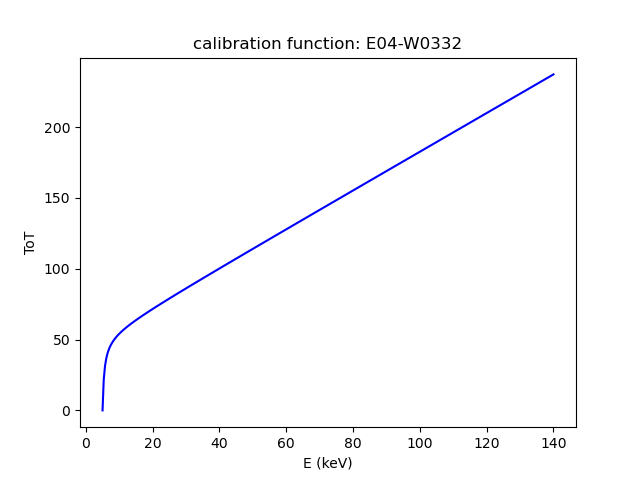

In [9]:
import os, inspect

#det_id = 'C07-W0337'   # flight CdTe detector (v2)
#det_id = 'J08-W0281'   # test-Si detector (v2)
det_id = 'E04-W0332'   # test-zlaty detector (v1)

det_configs_dir = os.path.join(os.path.dirname(inspect.getfile(rite_vs2)), 'detector_configs')
ca = np.loadtxt(os.path.join(det_configs_dir, 'config_' + det_id, 'caliba.txt'))
cb = np.loadtxt(os.path.join(det_configs_dir, 'config_' + det_id, 'calibb.txt'))
cc = np.loadtxt(os.path.join(det_configs_dir, 'config_' + det_id, 'calibc.txt'))
ct = np.loadtxt(os.path.join(det_configs_dir, 'config_' + det_id, 'calibt.txt'))

x = np.logspace(np.log10(5.0),np.log10(140))
x = x.reshape((x.size,1,1))
x = np.repeat(np.repeat(x,256,axis=1),256, axis=2)
y1 = ca*x + cb - cc/(x-ct)
y1 = np.mean(y1, axis=(1,2))
x = x[:,1,1]

plt.figure()
plt.title('calibration function: %s' % (det_id,))
plt.plot(x, y1, 'b')
plt.xlabel('E (keV)');
plt.ylabel('ToT');

In [22]:
# convert to float32

def write_as_bin(data, filename, dtype):
    buffer = data.astype(dtype)
    with open(filename,'wb') as fid:
        buffer.tofile(fid)

write_as_bin(ca, det_id+'_caliba.txt', np.float32)
write_as_bin(cb, det_id+'_calibb.txt', np.float32)
write_as_bin(cc, det_id+'_calibc.txt', np.float32)
write_as_bin(ct, det_id+'_calibt.txt', np.float32)

In [25]:
!ls -lrt

total 4352
-rw-r--r--   1 zdenek  staff   18461 Jan 26 22:25 Example1.ipynb
-rwxr-xr-x   1 zdenek  staff    6850 Jan 26 22:25 Example1.py
-rw-r--r--   1 zdenek  staff   34115 Jan 26 22:25 Meta1.ipynb
-rw-r--r--   1 zdenek  staff    1045 Jan 26 22:25 README.md
-rwxr-xr-x   1 zdenek  staff     677 Jan 26 22:25 cp_dk_data_vcom.py
-rw-r--r--   1 zdenek  staff   11856 Feb 21 22:29 Untitled.ipynb
drwxr-xr-x  15 zdenek  staff     480 Feb 22 02:06 rite_data
-rw-r--r--   1 zdenek  staff  109722 Feb 23 09:18 00_convert_text.ipynb
-rw-r--r--   1 zdenek  staff  433607 Mar 14 13:22 01_gm_2022-02-08.ipynb
-rw-r--r--   1 zdenek  staff  482391 Mar 14 13:28 01_gm_2022-02-08-Ada.ipynb
drwxr-xr-x   9 zdenek  staff     288 Apr 12 15:17 rite_vs2
-rw-r--r--   1 zdenek  staff  262144 Apr 14 22:45 E04-W0332_caliba.txt
-rw-r--r--   1 zdenek  staff  262144 Apr 14 22:45 E04-W0332_calibb.txt
-rw-r--r--   1 zdenek  staff  262144 Apr 14 22:45 E04-W0332_calibc.txt
-rw-r--r--   1 zdenek  staff  262144 Apr 14 22:45 E0

In [26]:
!pwd

/Users/zdenek/tmp/recon
